In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import yfinance as yf
from datetime import date,timedelta
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional

In [40]:
today = date.today()
years=5

start_date = (today - (date(today.year + years, 1, 1) - date(today.year, 1, 1)))
end_date = date.today()

stock = 'TSLA'
pe_value=yf.Ticker(stock).info

data = yf.download(stock, start_date, end_date)
pe_value['trailingPE']


[*********************100%%**********************]  1 of 1 completed


59.14578

In [41]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-06-26,186.539993,197.759995,186.360001,196.369995,196.369995,95737100
2024-06-27,195.169998,198.720001,194.050003,197.419998,197.419998,72746500
2024-06-28,199.550003,203.199997,195.259995,197.880005,197.880005,95438100
2024-07-01,201.020004,213.229996,200.850006,209.860001,209.860001,135691400
2024-07-02,218.889999,231.300003,218.059998,231.259995,231.259995,204211200


In [42]:
print("Shape of data:",data.shape)

Shape of data: (1258, 6)


In [43]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03
mean,187.733014,191.918896,183.254095,187.687367,187.687367,1.286475e+08
std,95.856965,97.863737,93.549293,95.693854,95.693854,8.323494e+07
min,14.240000,14.334667,14.066667,14.093333,14.093333,2.940180e+07
25%,135.198330,136.855827,127.637831,134.432331,134.432331,7.783598e+07
50%,203.974998,208.610001,198.551674,203.846664,203.846664,1.045224e+08
75%,251.392498,256.570000,246.292503,251.844997,251.844997,1.483030e+08
max,411.470001,414.496674,405.666656,409.970001,409.970001,9.140820e+08


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-07-03 to 2024-07-02
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [45]:
data.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [46]:
#data = data[['Open','Close', 'High', 'Low', 'Volume']]
#data.head(10)

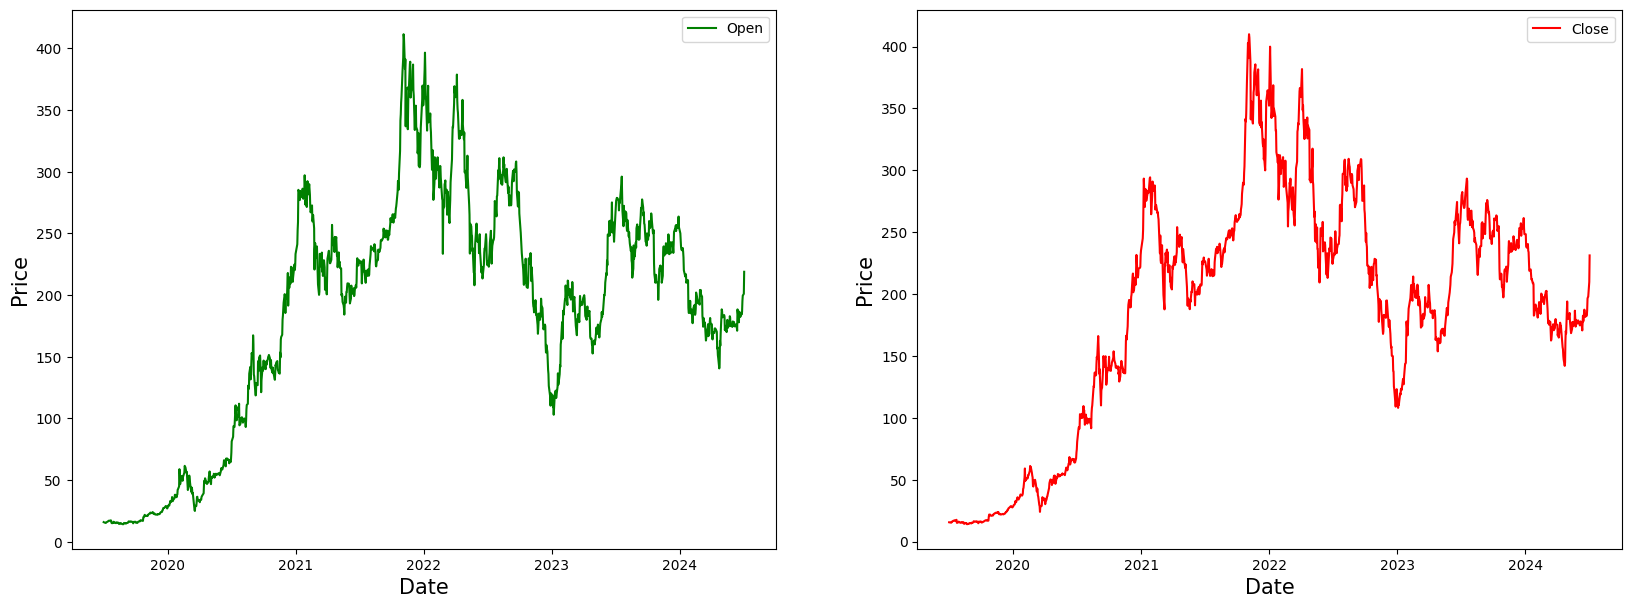

In [47]:
fig, ax =plt.subplots(1,2,figsize=(20,7))
ax[0].plot(data['Open'],label='Open',color='green')
ax[0].set_xlabel('Date',size=15)
ax[0].set_ylabel('Price',size=15)
ax[0].legend()

ax[1].plot(data['Close'],label='Close',color='Red')
ax[1].set_xlabel('Date',size=15)
ax[1].set_ylabel('Price',size=15)
ax[1].legend()

fig.show()

In [48]:
df=data.copy()
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-03,15.959333,16.104668,15.634000,15.660000,15.660000,213016500
2019-07-05,15.638000,15.696667,15.386667,15.540000,15.540000,105985500
2019-07-08,15.416000,15.483333,15.244000,15.356000,15.356000,88207500
2019-07-09,15.264667,15.400000,15.152000,15.337333,15.337333,92862000
2019-07-10,15.610000,15.929333,15.542667,15.928000,15.928000,137185500
...,...,...,...,...,...,...
2024-06-26,186.539993,197.759995,186.360001,196.369995,196.369995,95737100
2024-06-27,195.169998,198.720001,194.050003,197.419998,197.419998,72746500
2024-06-28,199.550003,203.199997,195.259995,197.880005,197.880005,95438100


In [49]:
#df = df[['Open']]

In [50]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-03,15.959333,16.104668,15.634000,15.660000,15.660000,213016500
2019-07-05,15.638000,15.696667,15.386667,15.540000,15.540000,105985500
2019-07-08,15.416000,15.483333,15.244000,15.356000,15.356000,88207500
2019-07-09,15.264667,15.400000,15.152000,15.337333,15.337333,92862000
2019-07-10,15.610000,15.929333,15.542667,15.928000,15.928000,137185500
...,...,...,...,...,...,...
2024-06-26,186.539993,197.759995,186.360001,196.369995,196.369995,95737100
2024-06-27,195.169998,198.720001,194.050003,197.419998,197.419998,72746500
2024-06-28,199.550003,203.199997,195.259995,197.880005,197.880005,95438100


In [51]:
MMS = MinMaxScaler()
df[df.columns] = MMS.fit_transform(df)
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-03,0.004328,0.004423,0.004002,0.003957,0.003957,0.207549
2019-07-05,0.003519,0.003404,0.003371,0.003654,0.003654,0.086567
2019-07-08,0.002961,0.002871,0.003006,0.003190,0.003190,0.066471
2019-07-09,0.002580,0.002662,0.002772,0.003142,0.003142,0.071732
2019-07-10,0.003449,0.003985,0.003769,0.004634,0.004634,0.121834
2019-07-11,0.004119,0.004412,0.004222,0.004581,0.004581,0.094174
2019-07-12,0.004389,0.005058,0.004888,0.005672,0.005672,0.122763
2019-07-15,0.005773,0.006564,0.005764,0.007090,0.007090,0.153275
2019-07-16,0.005991,0.006416,0.006287,0.006901,0.006901,0.104934


In [52]:
training_size = round(len(df) * 0.75) # Selecting 75 % for training and 25 % for testing
training_size

944

In [53]:
train_data = df[:training_size]
test_data  = df[training_size:]

train_data.shape, test_data.shape

((944, 6), (314, 6))

In [54]:
def create_sequence(dataset):
  sequences = []
  labels = []

  start_idx = 0

  for stop_idx in range(20,len(dataset)): # Selecting 20 rows at a time
    sequences.append(dataset.iloc[start_idx:stop_idx])
    labels.append(dataset.iloc[stop_idx])
    start_idx += 1

  return (np.array(sequences),np.array(labels))

In [55]:
x_train, y_train = create_sequence(train_data)
x_test, y_test = create_sequence(test_data)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((924, 20, 6), (924, 6), (294, 20, 6), (294, 6))

In [56]:
train_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-07-03,0.004328,0.004423,0.004002,0.003957,0.003957,0.207549
2019-07-05,0.003519,0.003404,0.003371,0.003654,0.003654,0.086567
2019-07-08,0.002961,0.002871,0.003006,0.003190,0.003190,0.066471
2019-07-09,0.002580,0.002662,0.002772,0.003142,0.003142,0.071732
2019-07-10,0.003449,0.003985,0.003769,0.004634,0.004634,0.121834
...,...,...,...,...,...,...
2023-03-27,0.453591,0.457453,0.449115,0.448919,0.448919,0.103370
2023-03-28,0.447499,0.444858,0.437598,0.442301,0.442301,0.078280
2023-03-29,0.450344,0.452205,0.447838,0.454148,0.454148,0.106545


In [57]:
x_train


array([[[0.00432831, 0.00442321, 0.00400238, 0.00395746, 0.00395746,
         0.20754924],
        [0.00351937, 0.00340362, 0.00337079, 0.00365434, 0.00365434,
         0.08656654],
        [0.0029605 , 0.0028705 , 0.00300647, 0.00318955, 0.00318955,
         0.06647114],
        ...,
        [0.00226401, 0.00348525, 0.00255874, 0.00410397, 0.00410397,
         0.12399701],
        [0.0032391 , 0.00472142, 0.00360572, 0.00519691, 0.00519691,
         0.10425598],
        [0.00493417, 0.00527453, 0.0043667 , 0.00508744, 0.00508744,
         0.12238456]],

       [[0.00351937, 0.00340362, 0.00337079, 0.00365434, 0.00365434,
         0.08656654],
        [0.0029605 , 0.0028705 , 0.00300647, 0.00318955, 0.00318955,
         0.06647114],
        [0.00257953, 0.00266225, 0.00277154, 0.00314239, 0.00314239,
         0.07173236],
        ...,
        [0.0032391 , 0.00472142, 0.00360572, 0.00519691, 0.00519691,
         0.10425598],
        [0.00493417, 0.00527453, 0.0043667 , 0.00508744, 0.005

In [58]:
y_train

array([[0.00487543, 0.00491301, 0.00353592, 0.00378064, 0.00378064,
        0.10680775],
       [0.00297896, 0.00354023, 0.00310351, 0.00386316, 0.00386316,
        0.07081169],
       [0.00268526, 0.0027239 , 0.00251617, 0.00284937, 0.00284937,
        0.08593241],
       ...,
       [0.45034364, 0.45220516, 0.44783795, 0.45414819, 0.45414819,
        0.10654494],
       [0.45651134, 0.45730312, 0.460555  , 0.45768463, 0.45768463,
        0.09138941],
       [0.46142033, 0.48344251, 0.46765407, 0.48845181, 0.48845181,
        0.1591765 ]])

In [59]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM, Bidirectional, Input

input_shape = (x_train.shape[0],x_train.shape[1], x_train.shape[2])

model = Sequential()

#model.add(Bidirectional(LSTM(128, return_sequences=True)))

#model.add(Bidirectional(LSTM(64, return_sequences=False, dropout=0.5)))

#model.add(Dense(20, activation='softmax'))

#model.add(Dense(1))

model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 6))
model.build(input_shape)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (924, 20, 50)             11400     
                                                                 
 dropout_4 (Dropout)         (924, 20, 50)             0         
                                                                 
 lstm_5 (LSTM)               (924, 20, 50)             20200     
                                                                 
 dropout_5 (Dropout)         (924, 20, 50)             0         
                                                                 
 lstm_6 (LSTM)               (924, 20, 50)             20200     
                                                                 
 dropout_6 (Dropout)         (924, 20, 50)             0         
                                                                 
 lstm_7 (LSTM)               (924, 50)                

In [60]:
from keras.optimizers import Adam

Adam_op=Adam(learning_rate = 0.001, beta_1 = 0.8, beta_2 = 0.99, amsgrad = False)

model.compile(loss='mean_squared_error',optimizer=Adam_op, metrics=['mean_absolute_error'])

In [61]:
model.fit(x_train,y_train,validation_data=(x_test,y_test), epochs=200, batch_size=64, verbose=1)

Epoch 1/200
15/15 [==============================] - 14s 225ms/step - loss: 0.0786 - mean_absolute_error: 0.2022 - val_loss: 0.0047 - val_mean_absolute_error: 0.0545
Epoch 2/200
15/15 [==============================] - 1s 61ms/step - loss: 0.0169 - mean_absolute_error: 0.0957 - val_loss: 0.0029 - val_mean_absolute_error: 0.0421
Epoch 3/200
15/15 [==============================] - 1s 95ms/step - loss: 0.0132 - mean_absolute_error: 0.0834 - val_loss: 0.0031 - val_mean_absolute_error: 0.0442
Epoch 4/200
15/15 [==============================] - 1s 98ms/step - loss: 0.0116 - mean_absolute_error: 0.0780 - val_loss: 0.0028 - val_mean_absolute_error: 0.0411
Epoch 5/200
15/15 [==============================] - 1s 61ms/step - loss: 0.0114 - mean_absolute_error: 0.0780 - val_loss: 0.0074 - val_mean_absolute_error: 0.0712
Epoch 6/200
15/15 [==============================] - 1s 62ms/step - loss: 0.0108 - mean_absolute_error: 0.0757 - val_loss: 0.0036 - val_mean_absolute_error: 0.0472
Epoch 7/200
15

In [62]:
test_predicted = model.predict(x_test)
test_predicted[:5]

10/10 [==============================] - 2s 12ms/step


array([[0.3674438 , 0.37356994, 0.36272597, 0.36941782, 0.36941466,
        0.12066495],
       [0.36702672, 0.37310308, 0.36228183, 0.36895555, 0.3689917 ,
        0.11974287],
       [0.36615437, 0.37219098, 0.36140272, 0.36805192, 0.368107  ,
        0.11883162],
       [0.36659086, 0.37259722, 0.36187342, 0.36848167, 0.36853492,
        0.11726355],
       [0.37735647, 0.38349327, 0.37277475, 0.37936834, 0.3793376 ,
        0.11545236]], dtype=float32)

In [63]:
test_predicted.shape

(294, 6)

In [64]:
test_inverse_predicted = MMS.inverse_transform(test_predicted)
s = test_inverse_predicted.shape[0]
test_inverse_predicted[:5]

array([[1.60199707e+02, 1.63823166e+02, 1.56110153e+02, 1.60337219e+02,
        1.60335968e+02, 1.36151680e+08],
       [1.60034027e+02, 1.63636337e+02, 1.55936234e+02, 1.60154221e+02,
        1.60168533e+02, 1.35335952e+08],
       [1.59687500e+02, 1.63271362e+02, 1.55591965e+02, 1.59796494e+02,
        1.59818298e+02, 1.34529792e+08],
       [1.59860886e+02, 1.63433914e+02, 1.55776291e+02, 1.59966629e+02,
        1.59987701e+02, 1.33142536e+08],
       [1.64137314e+02, 1.67794098e+02, 1.60045258e+02, 1.64276398e+02,
        1.64264236e+02, 1.31540224e+08]], dtype=float32)

In [65]:
df_merge = pd.concat([data.iloc[-1*s:].copy(),
                          pd.DataFrame(test_inverse_predicted,columns=['Open_predicted', 'High_predicted', 'Low_predicted', 'Close_predicted', 'Adj Close_predicted', 'Volume_predicted'],
                                       index=data.iloc[-1*s:].index)], axis=1)

In [66]:
df_merge

,Open,High,Low,Close,Adj Close,Volume,Open_predicted,High_predicted,Low_predicted,Close_predicted,Adj Close_predicted,Volume_predicted
Date,,,,,,,,,,,,
2023-05-02,161.880005,165.490005,158.929993,160.309998,160.309998,128259700,160.199707,163.823166,156.110153,160.337219,160.335968,136151680.0
2023-05-03,160.009995,165.000000,159.910004,160.610001,160.610001,119728000,160.034027,163.636337,155.936234,160.154221,160.168533,135335952.0
2023-05-04,162.710007,162.949997,159.649994,161.199997,161.199997,95108500,159.687500,163.271362,155.591965,159.796494,159.818298,134529792.0
2023-05-05,163.970001,170.789993,163.509995,170.059998,170.059998,107440900,159.860886,163.433914,155.776291,159.966629,159.987701,133142536.0
2023-05-08,173.720001,173.800003,169.190002,171.789993,171.789993,112249400,164.137314,167.794098,160.045258,164.276398,164.264236,131540224.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-06-26,186.539993,197.759995,186.360001,196.369995,196.369995,95737100,184.002808,187.912323,179.773254,184.242569,184.183838,95882248.0
2024-06-27,195.169998,198.720001,194.050003,197.419998,197.419998,72746500,190.186127,194.233215,185.917252,190.470459,190.366821,95039392.0
2024-06-28,199.550003,203.199997,195.259995,197.880005,197.880005,95438100,195.723099,199.903671,191.373169,196.029465,195.907318,94770296.0


In [67]:
df_merge.tail(15)

,Open,High,Low,Close,Adj Close,Volume,Open_predicted,High_predicted,Low_predicted,Close_predicted,Adj Close_predicted,Volume_predicted
Date,,,,,,,,,,,,
2024-06-11,173.919998,174.750000,167.410004,170.660004,170.660004,64761900,175.036575,178.671448,171.118408,175.318924,175.197281,87790000.0
2024-06-12,171.119995,180.550003,169.800003,177.289993,177.289993,90389400,171.655914,175.206772,167.774628,171.918076,171.815109,86689112.0
2024-06-13,188.389999,191.080002,181.229996,182.470001,182.470001,118984100,172.849792,176.435547,168.999268,173.147308,173.011383,86845448.0
2024-06-14,185.800003,186.000000,176.919998,178.009995,178.009995,82038200,179.859894,183.638000,175.976532,180.235199,180.034927,89112840.0
2024-06-17,177.919998,188.809998,177.000000,187.440002,187.440002,109786100,181.211945,185.057678,177.256317,181.584076,181.399826,92028160.0
2024-06-18,186.559998,187.199997,182.369995,184.860001,184.860001,68982300,183.595703,187.536819,179.557648,183.969650,183.797119,95615680.0
2024-06-20,184.679993,185.210007,179.660004,181.570007,181.570007,55893100,185.534607,189.546097,181.408157,185.891617,185.744324,98482648.0
2024-06-21,182.300003,183.949997,180.690002,183.009995,183.009995,63029500,183.918945,187.892654,179.727112,184.219757,184.127426,99546144.0
2024-06-24,184.970001,188.800003,182.550003,182.580002,182.580002,61992100,182.414673,186.337036,178.195526,182.671555,182.615204,99135128.0


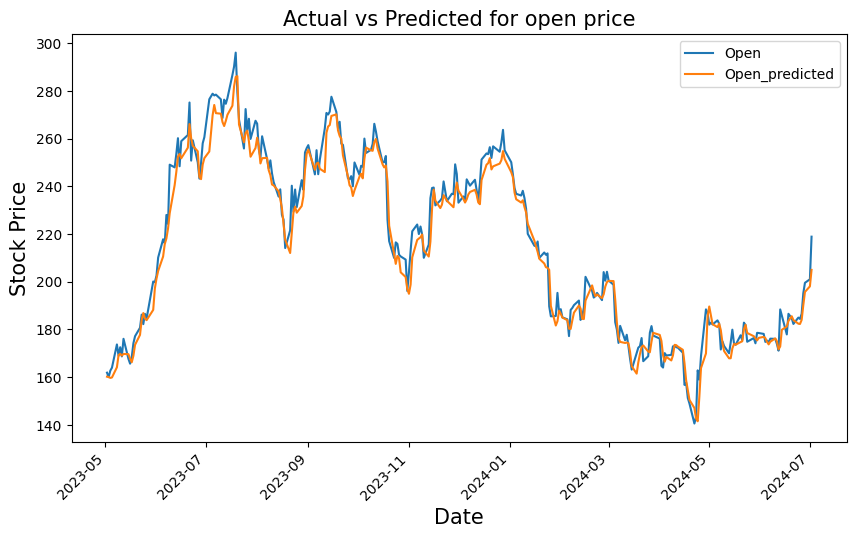

In [68]:
df_merge[['Open','Open_predicted']].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for open price',size=15)
plt.show()

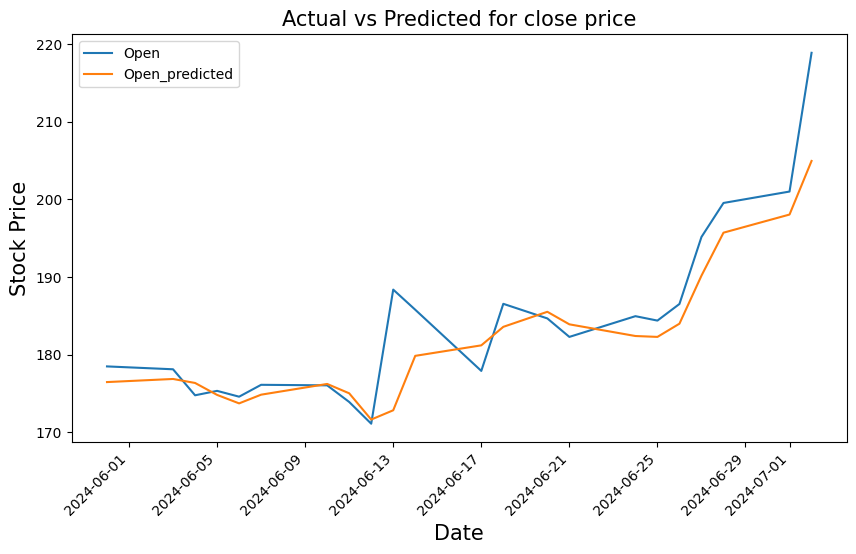

In [69]:
df_merge[['Open','Open_predicted']][-22:].plot(figsize=(10,6))
plt.xticks(rotation=45)
plt.xlabel('Date',size=15)
plt.ylabel('Stock Price',size=15)
plt.title('Actual vs Predicted for close price',size=15)
plt.show()

In [70]:
df_future = df_merge._append(pd.DataFrame(columns=df_merge.columns,index=pd.date_range(start=df_merge.index[-1], periods=3, freq='D')))
#df_merge[date.today(): date.today()+timedelta(12)]

In [71]:
upcoming_prediction = pd.DataFrame(columns=['Open','High','Low','Close','Adj Close','Volume'],index=df_future[-3:].index)
upcoming_prediction.index=pd.to_datetime(upcoming_prediction.index)

In [72]:
curr_seq = x_test[-1:]
x = None
for i in range(-2,0):
  up_pred = model.predict(curr_seq)
  upcoming_prediction.iloc[i] = up_pred
  curr_seq = np.append(curr_seq[0][1:],up_pred,axis=0)
  curr_seq = curr_seq.reshape(x_test[-1:].shape)

1/1 [==============================] - 0s 31ms/step


In [73]:
up_pred

array([[0.48466095, 0.4922266 , 0.48007423, 0.48743355, 0.48720527,
        0.0808912 ]], dtype=float32)

In [74]:
upcoming_prediction.iloc[0] = df.iloc[-1]
upcoming_prediction

,Open,High,Low,Close,Adj Close,Volume
2024-07-02,0.515193,0.542194,0.520923,0.548572,0.548572,0.197596
2024-07-03,0.48013,0.487512,0.475827,0.482963,0.482645,0.077344
2024-07-04,0.484661,0.492227,0.480074,0.487434,0.487205,0.080891


In [75]:
upcoming_prediction[upcoming_prediction.columns] = MMS.inverse_transform(upcoming_prediction[upcoming_prediction.columns])
upcoming_prediction

,Open,High,Low,Close,Adj Close,Volume
2024-07-02,218.889999,231.300003,218.059998,231.259995,231.259995,2.042112e+08
2024-07-03,204.961905,209.418265,200.400670,205.287245,205.161147,9.782662e+07
2024-07-04,206.761871,211.305051,202.063729,207.056904,206.966531,1.009646e+08


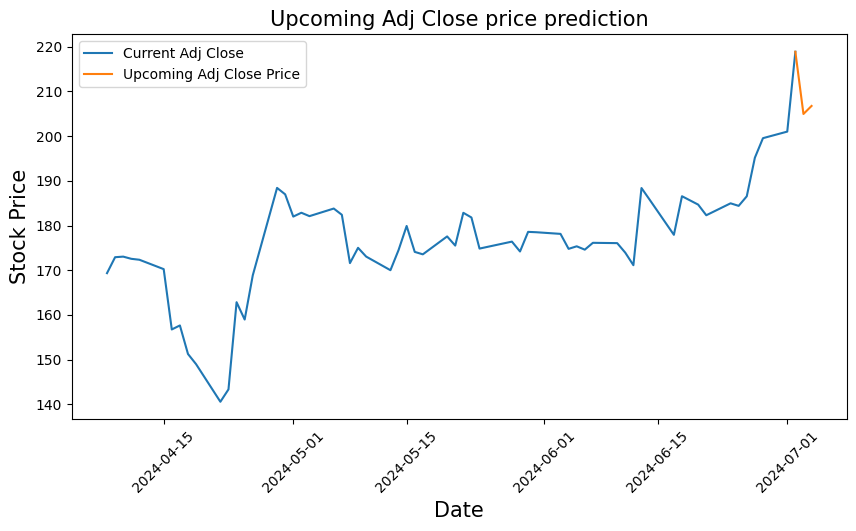

In [76]:
fig,ax=plt.subplots(figsize=(10,5))
ax.plot(df_merge.iloc[-60:]['Open'],label='Current Adj Close')
ax.plot(upcoming_prediction.iloc[-60:]['Open'],label='Upcoming Adj Close Price')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45)
ax.set_xlabel('Date',size=15)
ax.set_ylabel('Stock Price',size=15)
ax.set_title('Upcoming Adj Close price prediction',size=15)
ax.legend()
fig.show()